In [169]:
import os
os.chdir("C:\\Users\\83688\\Documents\\ML\\Logistic regressiopn\\h1_n1 prediction")
import pandas as pd 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

In [171]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')

In [172]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [173]:
# lets drop 1st unique_id 
df33 = df.drop(['unique_id'], axis = 1)
df33.info() # now 33 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [174]:
# droping all will give 11794 rows only 50% values 
dfnomissing = df33.dropna()
dfnomissing.info() # # 11,794 rows; 33 columns
# its not a good idea to carry with 11,794 rows
## note that index identification remains same as in 
# the original file 
'''
so, we will remove the column- "has_health_insur" (14433 rows only)
and create a new file name 'df32'. This is shown below. 
'''

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 11794 non-null  float64
 1   h1n1_awareness             11794 non-null  float64
 2   antiviral_medication       11794 non-null  float64
 3   contact_avoidance          11794 non-null  float64
 4   bought_face_mask           11794 non-null  float64
 5   wash_hands_frequently      11794 non-null  float64
 6   avoid_large_gatherings     11794 non-null  float64
 7   reduced_outside_home_cont  11794 non-null  float64
 8   avoid_touch_face           11794 non-null  float64
 9   dr_recc_h1n1_vacc          11794 non-null  float64
 10  dr_recc_seasonal_vacc      11794 non-null  float64
 11  chronic_medic_condition    11794 non-null  float64
 12  cont_child_undr_6_mnths    11794 non-null  float64
 13  is_health_worker           11794 non-null  flo

'\nso, we will remove the column- "has_health_insur" (14433 rows only)\nand create a new file name \'df32\'. This is shown below. \n'

In [175]:
df32 = df33.drop(['has_health_insur'], axis = 1)

df32.info() # observe many missing values in many columns, now 32 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [261]:
# lets remove all missing values from df32
df_vac = df32.dropna() # 19642 , 32 
df_vac.info()
## now , 19642 is a good no to go with! 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

In [177]:
# 1 h1n1_vaccine - Target Variable
df_vac.h1n1_vaccine.isnull().sum() #No Missing values
df_vac.h1n1_vaccine.value_counts() 


0    15128
1     4514
Name: h1n1_vaccine, dtype: int64

Text(0.5, 1.0, 'Barplot of h1n1_vaccine')

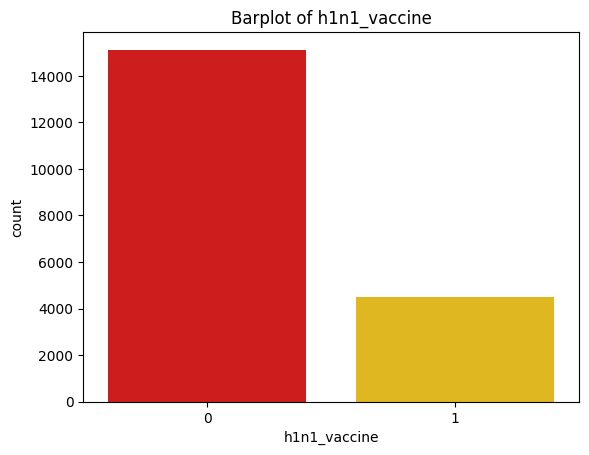

In [178]:
# Bar Plot
sns.countplot(x = 'h1n1_vaccine', data = df_vac , palette = 'hot')
plt.title('Barplot of h1n1_vaccine')

### __________________ 2 h1n1_worry [0,1,2,3] ordered

Text(0.5, 1.0, 'Histogram of h1n1_worry')

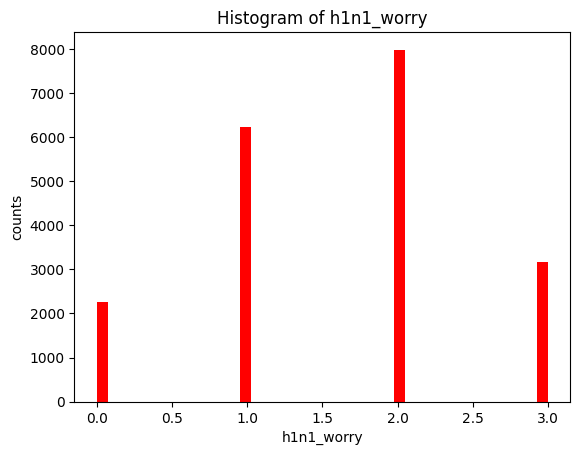

In [179]:
#______histogram
#_run in block
plt.hist(df_vac.h1n1_worry, bins = 'auto', facecolor = 'red')
plt.xlabel('h1n1_worry')
plt.ylabel('counts')
plt.title('Histogram of h1n1_worry') 

<AxesSubplot: >

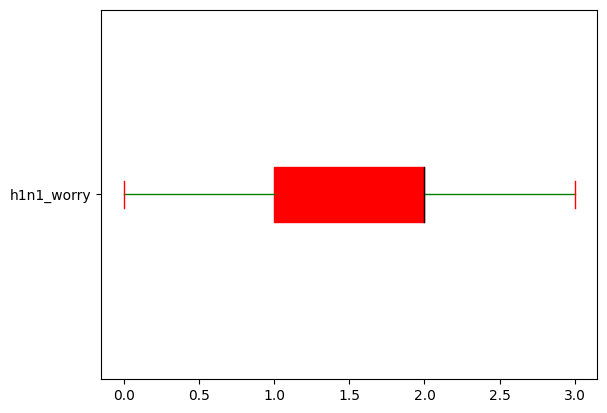

In [180]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['h1n1_worry'].plot.box(color=props2, patch_artist = True, vert = False) #No outliers


In [182]:
print(df_vac.h1n1_worry.isnull().sum()) #0 Missing values
df_vac.h1n1_worry.value_counts() 

0


2.0    7989
1.0    6229
3.0    3175
0.0    2249
Name: h1n1_worry, dtype: int64

In [183]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('h1n1_worry ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
# 1.564e-79 ie p_value is <0.05; Ho Reject; Good Predictor

                   df        sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0    278.817902  278.817902  359.846071  1.564062e-79
Residual      19640.0  15217.572282    0.774825         NaN           NaN


In [184]:
# let's judge from chisquare way! ( just for checking from this approach)    
from scipy.stats import chi2_contingency
ct_worry = pd.crosstab(df_vac.h1n1_vaccine, df_vac.h1n1_worry)
chi2_contingency(ct_worry, correction = False)
# p_val = 4.9e-78, Ho reject, hence association exists, good predictor

(361.4688796942114,
 4.900068231096281e-78,
 3,
 array([[1732.14906832, 4797.49068323, 6153.01863354, 2445.34161491],
        [ 516.85093168, 1431.50931677, 1835.98136646,  729.65838509]]))

### _____________________________# 3 h1n1_awareness [0,1,2] ordered


Text(0.5, 1.0, 'Histogram of h1n1_awareness')

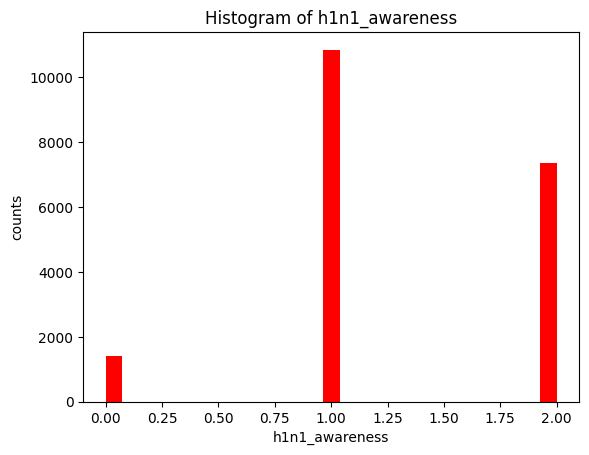

In [185]:
#______histogram
#_run in block
plt.hist(df_vac.h1n1_awareness, bins = 'auto', facecolor = 'red')
plt.xlabel('h1n1_awareness')
plt.ylabel('counts')
plt.title('Histogram of h1n1_awareness') 

<AxesSubplot: >

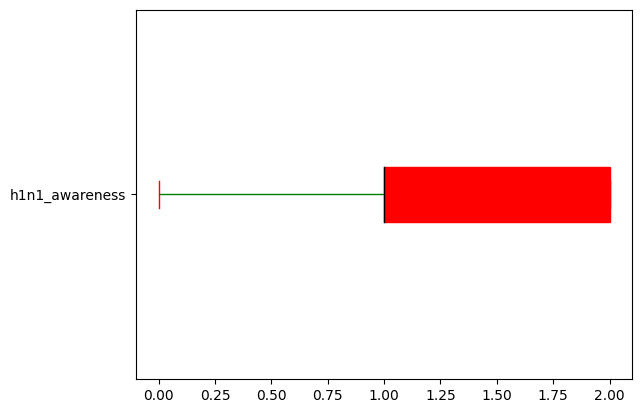

In [186]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['h1n1_awareness'].plot.box(color=props2, patch_artist = True, vert = False) #No outliers


In [187]:
print(df_vac.h1n1_awareness.isnull().sum()) #0 Missing values
df_vac.h1n1_awareness.value_counts() 

0


1.0    10861
2.0     7362
0.0     1419
Name: h1n1_awareness, dtype: int64

Text(0.5, 1.0, 'Countplot of h1n1_awareness')

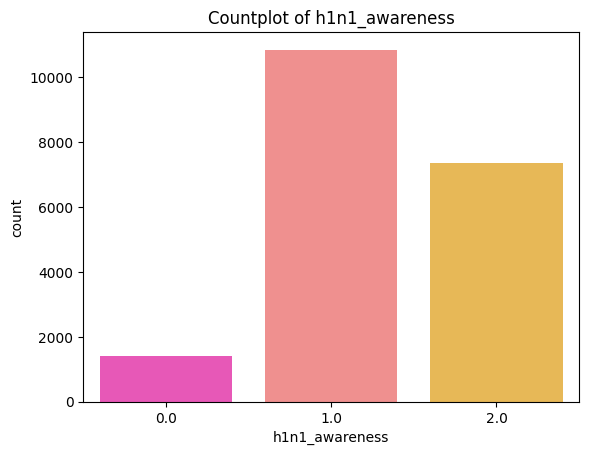

In [188]:
# Bar Plot
sns.countplot(x = 'h1n1_awareness', data = df_vac , palette = 'spring')
plt.title('Countplot of h1n1_awareness')

In [189]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('h1n1_awareness ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#3.442e-70 ie  p_value is <0.05; Ho Reject; Good Predictor

                   df       sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0   110.644675  110.644675  316.210167  3.441770e-70
Residual      19640.0  6872.206002    0.349909         NaN           NaN


### _______________ 4 antiviral_medication [0 and 1]


In [190]:
print(df_vac.antiviral_medication.isnull().sum()) #0 Missing values
df_vac.antiviral_medication.value_counts() 

0


0.0    18671
1.0      971
Name: antiviral_medication, dtype: int64

(25.7430310280289,
 3.900328532557542e-07,
 1,
 array([[14380.14906832,   747.85093168],
        [ 4290.85093168,   223.14906832]]))

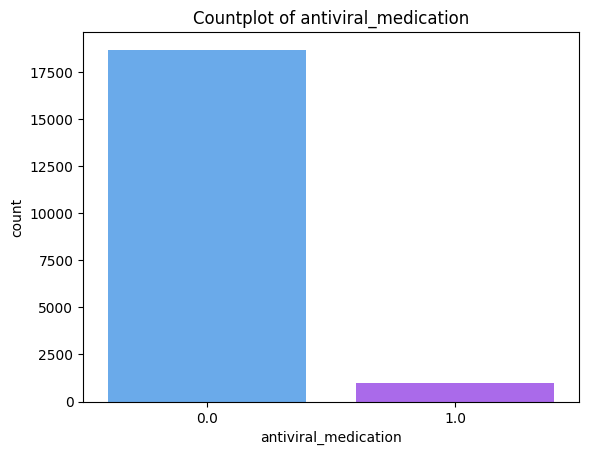

In [191]:
# Bar Plot
sns.countplot(x = 'antiviral_medication', data = df_vac , palette = 'cool')
plt.title('Countplot of antiviral_medication')

#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_antiviral = pd.crosstab(df_vac.h1n1_vaccine, df_vac.antiviral_medication)
chi2_contingency(ct_antiviral, correction = False)
# p_val = 3.9e-7, Ho reject, hence association exists, good predictor

### ________________ 5 contact_avoidance [0 and 1]


In [192]:
print(df_vac.contact_avoidance.isnull().sum()) #0 Missing values
df_vac.contact_avoidance.value_counts()

0


1.0    14544
0.0     5098
Name: contact_avoidance, dtype: int64

Text(0.5, 1.0, 'Countplot of contact_avoidance')

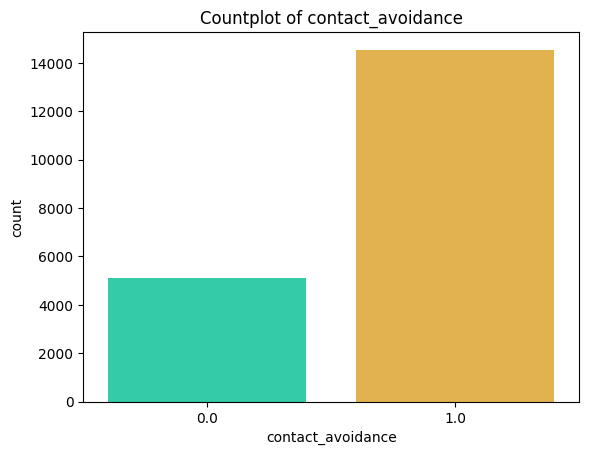

In [193]:
# Bar Plot
sns.countplot(x = 'contact_avoidance', data = df_vac , palette = 'turbo')
plt.title('Countplot of contact_avoidance')

In [194]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_avoid = pd.crosstab(df_vac.h1n1_vaccine, df_vac.contact_avoidance)
chi2_contingency(ct_avoid, correction = False)
# p_val = 6.6 e-10, Ho reject, hence association exists, good predictor

(38.119047488867295,
 6.655721920427935e-10,
 1,
 array([[ 3926.40993789, 11201.59006211],
        [ 1171.59006211,  3342.40993789]]))

### _________________ 6 bought_face_mask [0 and 1]


In [195]:
print(df_vac.bought_face_mask.isnull().sum()) #0 Missing values
df_vac.bought_face_mask.value_counts() 

0


0.0    18312
1.0     1330
Name: bought_face_mask, dtype: int64

(111.38079745607507,
 4.8829999983371125e-26,
 1,
 array([[14103.65217391,  1024.34782609],
        [ 4208.34782609,   305.65217391]]))

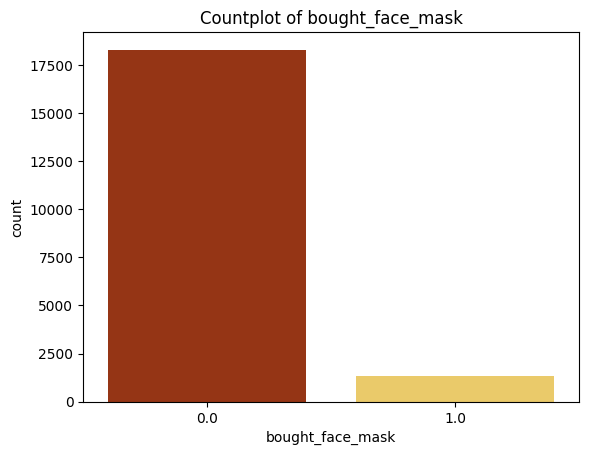

In [196]:
# Bar Plot
sns.countplot(x = 'bought_face_mask', data = df_vac , palette = 'afmhot')
plt.title('Countplot of bought_face_mask')
#Hypothesis Testing
ct_mask = pd.crosstab(df_vac.h1n1_vaccine, df_vac.bought_face_mask)
chi2_contingency(ct_mask, correction = False)
# p_val = 4.9 e-26, Ho reject, hence association exists, good predictor

### ________________ 7 wash_hands_frequently [0 and 1] 


In [197]:
print(df_vac.wash_hands_frequently.isnull().sum()) #0 Missing values
df_vac.wash_hands_frequently.value_counts()

0


1.0    16399
0.0     3243
Name: wash_hands_frequently, dtype: int64

(111.62137100015417,
 4.32500265148964e-26,
 1,
 array([[ 2497.71428571, 12630.28571429],
        [  745.28571429,  3768.71428571]]))

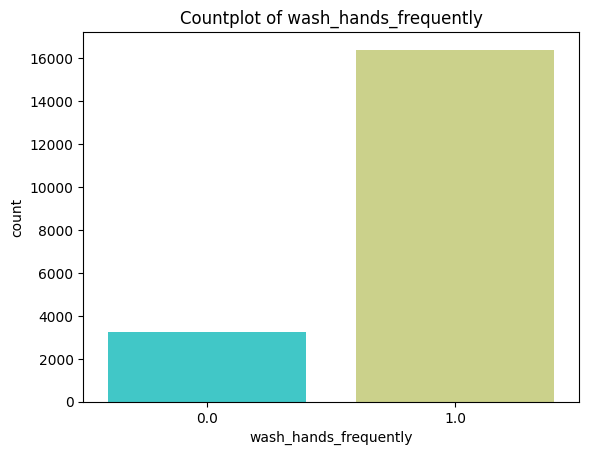

In [198]:
# Bar Plot
sns.countplot(x = 'wash_hands_frequently', data = df_vac , palette = 'rainbow')
plt.title('Countplot of wash_hands_frequently')

#Hypothesis Testing
ct_wash = pd.crosstab(df_vac.h1n1_vaccine, df_vac.wash_hands_frequently)
chi2_contingency(ct_wash, correction = False)
# p_val = 4.3 e-26, Ho reject, hence association exists, good predictor 

### __________________ 8 avoid_large_gatherings [0 and 1]


In [199]:
print(df_vac.avoid_large_gatherings.isnull().sum()) #0 Missing values
df_vac.avoid_large_gatherings.value_counts() 

0


0.0    12703
1.0     6939
Name: avoid_large_gatherings, dtype: int64

(8.326019959345679,
 0.003908118862931521,
 1,
 array([[9783.67701863, 5344.32298137],
        [2919.32298137, 1594.67701863]]))

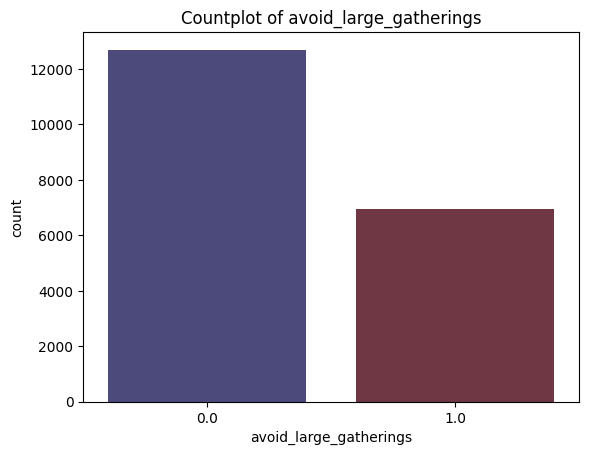

In [200]:
# Bar Plot
sns.countplot(x = 'avoid_large_gatherings', data = df_vac , palette = 'icefire')
plt.title('Countplot of avoid_large_gatherings')
#Hypothesis Testing
ct_gath = pd.crosstab(df_vac.h1n1_vaccine, df_vac.avoid_large_gatherings)
chi2_contingency(ct_gath, correction = False)
# p_val = 0.004, Ho reject, hence association exists, good predictor 

### ______________ 9 reduced_outside_home_cont [0 and 1] 


In [201]:
print(df_vac.reduced_outside_home_cont.isnull().sum()) #0 Missing values
df_vac.reduced_outside_home_cont.value_counts() 

0


0.0    13159
1.0     6483
Name: reduced_outside_home_cont, dtype: int64

(5.859941970831115,
 0.015489304669565737,
 1,
 array([[10134.88198758,  4993.11801242],
        [ 3024.11801242,  1489.88198758]]))

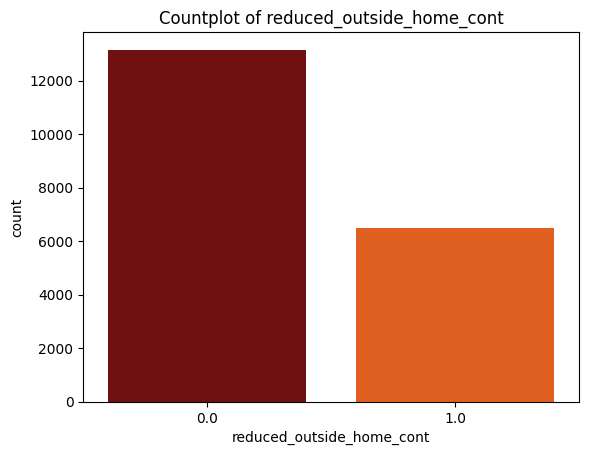

In [202]:
# Bar Plot
sns.countplot(x = 'reduced_outside_home_cont', data = df_vac , palette = 'gist_heat')
plt.title('Countplot of reduced_outside_home_cont')
#Hypothesis Testing
ct_outside = pd.crosstab(df_vac.h1n1_vaccine, df_vac.reduced_outside_home_cont)
chi2_contingency(ct_outside, correction = False)
# p_val = 0.015, Ho reject, hence association exists, good predictor

### __________________10 avoid_touch_face [0 and 1]


In [203]:
print(df_vac.avoid_touch_face.isnull().sum()) #0 Missing values
df_vac.avoid_touch_face.value_counts() 

0


1.0    13455
0.0     6187
Name: avoid_touch_face, dtype: int64

(99.97660321127165,
 1.5420802703508326e-23,
 1,
 array([[ 4765.14285714, 10362.85714286],
        [ 1421.85714286,  3092.14285714]]))

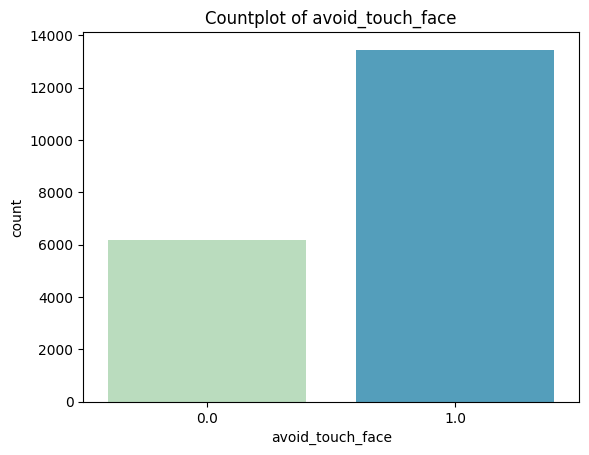

In [204]:
# Bar Plot
sns.countplot(x = 'avoid_touch_face', data = df_vac , palette = 'GnBu')
plt.title('Countplot of avoid_touch_face')
#Hypothesis Testing
ct_face = pd.crosstab(df_vac.h1n1_vaccine, df_vac.avoid_touch_face)
chi2_contingency(ct_face, correction = False)
# p_val = 1.5e-23, Ho reject, hence association exists, good predictor 


### _____________________ 11 dr_recc_h1n1_vacc [0 and 1]


In [205]:
print(df_vac.dr_recc_h1n1_vacc.isnull().sum()) #0 Missing values
df_vac.dr_recc_h1n1_vacc.value_counts() 

0


0.0    15203
1.0     4439
Name: dr_recc_h1n1_vacc, dtype: int64

(3094.6916755786597,
 0.0,
 1,
 array([[11709.14285714,  3418.85714286],
        [ 3493.85714286,  1020.14285714]]))

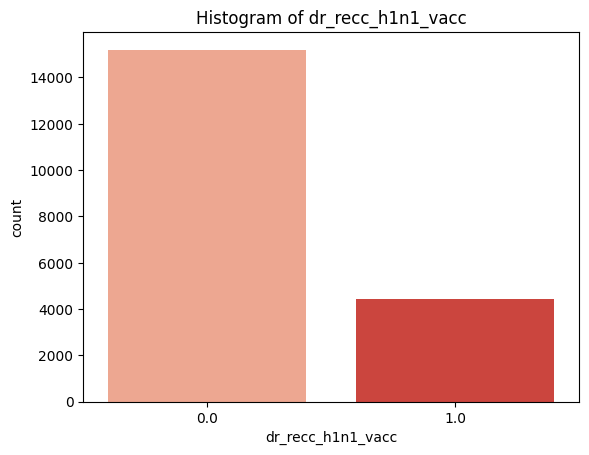

In [206]:
# Bar Plot
sns.countplot(x = 'dr_recc_h1n1_vacc', data = df_vac , palette = 'Reds')
plt.title('Histogram of dr_recc_h1n1_vacc')
#Hypothesis Testing
ct_drrec = pd.crosstab(df_vac.h1n1_vaccine, df_vac.dr_recc_h1n1_vacc)
chi2_contingency(ct_drrec, correction = False)
# p_val = 0, Ho reject, hence association exists, good predictor 

### _______________ 12 dr_recc_seasonal_vacc [0 and 1]


In [207]:
print(df_vac.dr_recc_seasonal_vacc.isnull().sum()) #0 Missing values
df_vac.dr_recc_seasonal_vacc.value_counts()

0


0.0    13091
1.0     6551
Name: dr_recc_seasonal_vacc, dtype: int64

(875.3779473401858,
 2.21025047497519e-192,
 1,
 array([[10082.50931677,  5045.49068323],
        [ 3008.49068323,  1505.50931677]]))

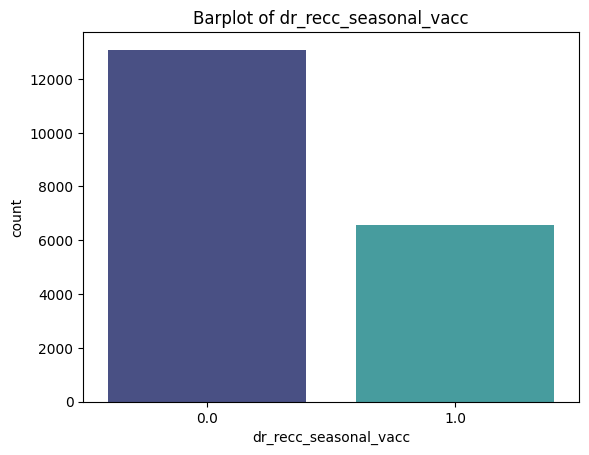

In [208]:
# Bar Plot
sns.countplot(x = 'dr_recc_seasonal_vacc', data = df_vac , palette = 'mako')
plt.title('Barplot of dr_recc_seasonal_vacc')
#Hypothesis Testing
ct_drseason = pd.crosstab(df_vac.h1n1_vaccine, df_vac.dr_recc_seasonal_vacc)
chi2_contingency(ct_drseason, correction = False)
# p_val = 2.2e-192, Ho reject, hence association exists, good predictor 

### ________________________ 13 chronic_medic_condition [0 and 1]


In [209]:
print(df_vac.chronic_medic_condition.isnull().sum()) #0 Missing values
df_vac.chronic_medic_condition.value_counts()

0


0.0    14066
1.0     5576
Name: chronic_medic_condition, dtype: int64

(219.14944840010486,
 1.3864754403096512e-49,
 1,
 array([[10833.44099379,  4294.55900621],
        [ 3232.55900621,  1281.44099379]]))

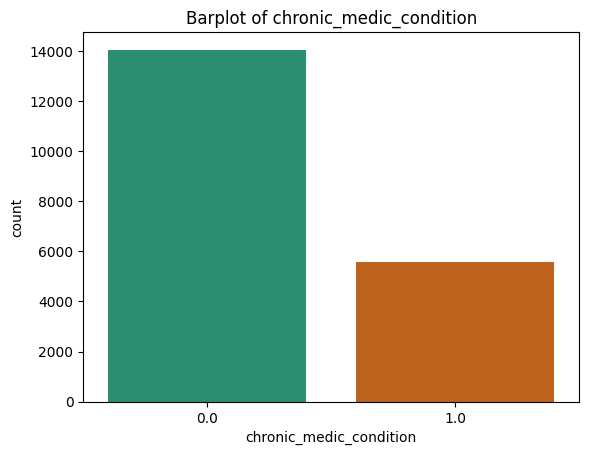

In [210]:
# Bar Plot
sns.countplot(x = 'chronic_medic_condition', data = df_vac , palette = 'Dark2')
plt.title('Barplot of chronic_medic_condition')
#Hypothesis Testing
ct_chronic = pd.crosstab(df_vac.h1n1_vaccine, df_vac.chronic_medic_condition)
chi2_contingency(ct_chronic, correction = False)
# p_val = 1.39e-49, Ho reject, hence association exists, good predictor 


### _________________ 14 cont_child_undr_6_mnths [0 and 1]


In [211]:
print(df_vac.cont_child_undr_6_mnths.isnull().sum()) #0 Missing values
df_vac.cont_child_undr_6_mnths.value_counts() 

0


0.0    17995
1.0     1647
Name: cont_child_undr_6_mnths, dtype: int64

(110.12378230842235,
 9.205896231946304e-26,
 1,
 array([[13859.50310559,  1268.49689441],
        [ 4135.49689441,   378.50310559]]))

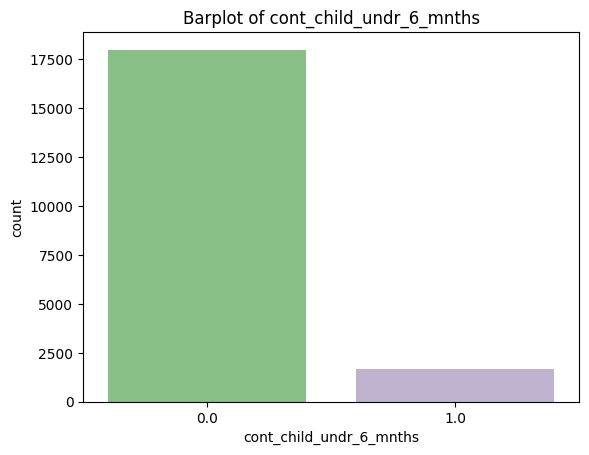

In [212]:
# Bar Plot
sns.countplot(x = 'cont_child_undr_6_mnths', data = df_vac , palette = 'Accent')
plt.title('Barplot of cont_child_undr_6_mnths')
#Hypothesis Testing
ct_child = pd.crosstab(df_vac.h1n1_vaccine, df_vac.cont_child_undr_6_mnths)
chi2_contingency(ct_child, correction = False)
# p_val = 9.2e-26, Ho reject, hence association exists, good predictor 

### ____________________ 15 is_health_worker [0 and 1]


In [213]:
print(df_vac.is_health_worker.isnull().sum()) #0 Missing values
df_vac.is_health_worker.value_counts() 

0


0.0    17310
1.0     2332
Name: is_health_worker, dtype: int64

(690.2288349047097,
 3.985927974118901e-152,
 1,
 array([[13331.92546584,  1796.07453416],
        [ 3978.07453416,   535.92546584]]))

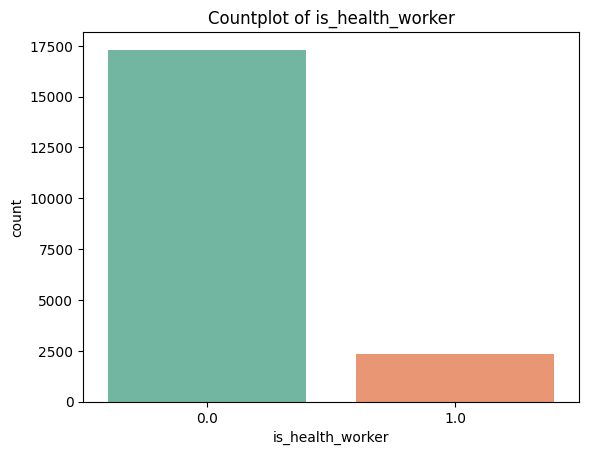

In [214]:
# Bar Plot
sns.countplot(x = 'is_health_worker', data = df_vac , palette = 'Set2')
plt.title('Countplot of is_health_worker')
#Hypothesis Testing
ct_hw = pd.crosstab(df_vac.h1n1_vaccine, df_vac.is_health_worker)
chi2_contingency(ct_hw, correction = False)
# p_val = 4e-152, Ho reject, hence association exists, good predictor

### ____________________ 16 is_h1n1_vacc_effective [1,2,3,4,5] ordered


Text(0.5, 1.0, 'Histogram of is_h1n1_vacc_effective')

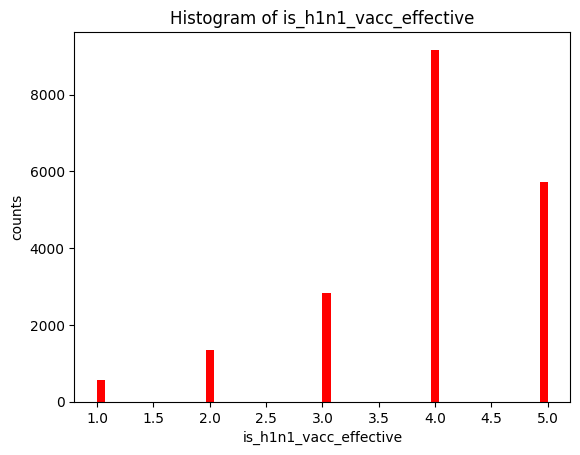

In [217]:
#______histogram
#_run in block
plt.hist(df_vac.is_h1n1_vacc_effective, bins = 'auto', facecolor = 'red')
plt.xlabel('is_h1n1_vacc_effective')
plt.ylabel('counts')
plt.title('Histogram of is_h1n1_vacc_effective') 


0


4.0    9172
5.0    5715
3.0    2838
2.0    1347
1.0     570
Name: is_h1n1_vacc_effective, dtype: int64

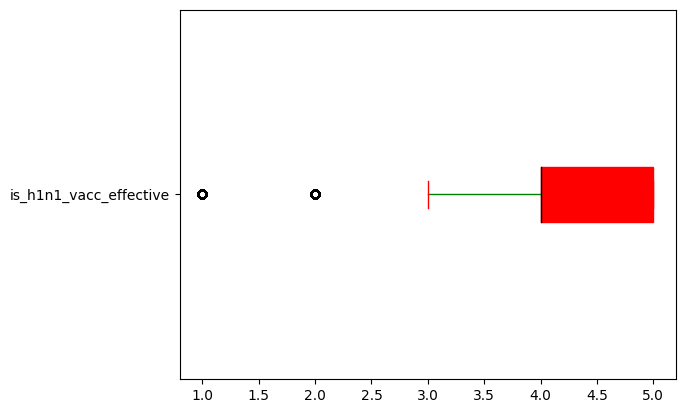

In [218]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['is_h1n1_vacc_effective'].plot.box(color=props2, patch_artist = True, vert = False)

# few outliers on lower side; IGNORE! 
print(df_vac.is_h1n1_vacc_effective.isnull().sum()) #0 Missing values
df_vac.is_h1n1_vacc_effective.value_counts() 

                   df        sum_sq      mean_sq            F  PR(>F)
h1n1_vaccine      1.0   1411.109998  1411.109998  1579.950867     0.0
Residual      19640.0  17541.178618     0.893135          NaN     NaN


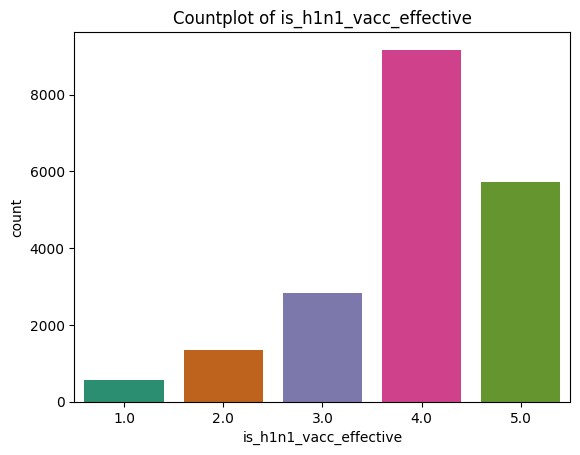

In [219]:
# Bar Plot
sns.countplot(x = 'is_h1n1_vacc_effective', data = df_vac , palette = 'Dark2')
plt.title('Countplot of is_h1n1_vacc_effective')
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('is_h1n1_vacc_effective~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.0  ie p_value which is <0.05; Ho Reject; Good Predictor

### _______________________ 17 is_h1n1_risky [1,2,3,4,5] ordered


0


2.0    7691
1.0    5881
4.0    4184
5.0    1348
3.0     538
Name: is_h1n1_risky, dtype: int64

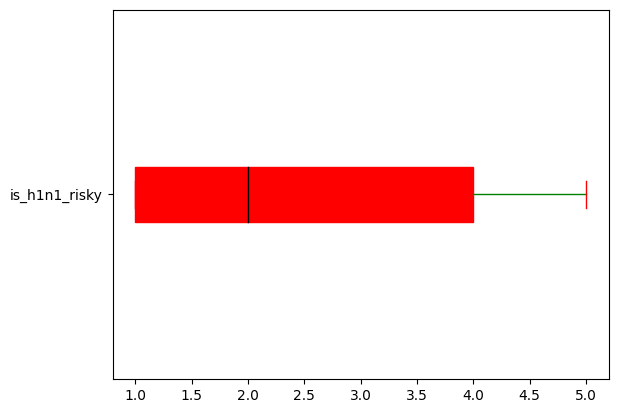

In [221]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['is_h1n1_risky'].plot.box(color=props2, patch_artist = True, vert = False) #No outliers

print(df_vac.is_h1n1_risky.isnull().sum()) #0 Missing values
df_vac.is_h1n1_risky.value_counts() 

                   df        sum_sq      mean_sq            F  PR(>F)
h1n1_vaccine      1.0   4134.782428  4134.782428  2838.602067     0.0
Residual      19640.0  28608.140543     1.456626          NaN     NaN


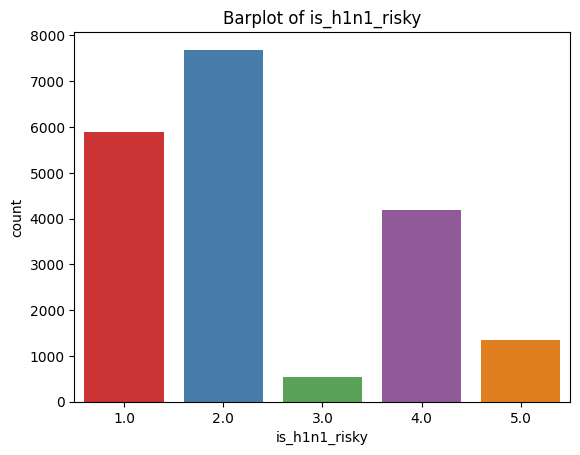

In [222]:
# Bar Plot
sns.countplot(x = 'is_h1n1_risky', data = df_vac , palette = 'Set1')
plt.title('Barplot of is_h1n1_risky')

#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('is_h1n1_risky ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.0  ie p_value is <0.05; Ho Reject; Good Predictor

### ____________________ 18 sick_from_h1n1_vacc [1,2,3,4,5] ordered 


0


2.0    6956
1.0    6684
4.0    4390
5.0    1560
3.0      52
Name: sick_from_h1n1_vacc, dtype: int64

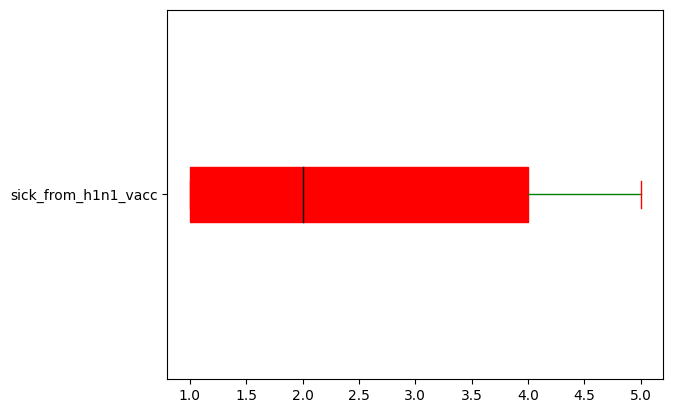

In [223]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['sick_from_h1n1_vacc'].plot.box(color=props2, patch_artist = True, vert = False) #No outliers

print(df_vac.sick_from_h1n1_vacc.isnull().sum()) #0 Missing values
df_vac.sick_from_h1n1_vacc.value_counts() 

                   df        sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0    246.018980  246.018980  135.282692  3.623260e-31
Residual      19640.0  35716.414988    1.818555         NaN           NaN


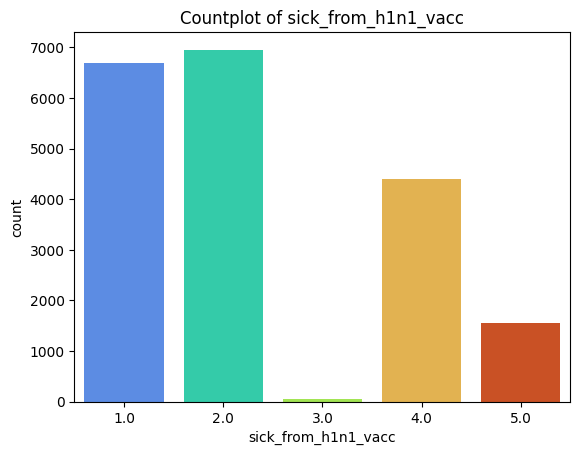

In [224]:
# Bar Plot
sns.countplot(x = 'sick_from_h1n1_vacc', data = df_vac , palette = 'turbo')
plt.title('Countplot of sick_from_h1n1_vacc')

#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('sick_from_h1n1_vacc ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#3.62e-31  ie p_value is <0.05; Ho Reject; Good Predictor


### _______________ 19 is_seas_vacc_effective [1,2,3,4,5] ordered


0


4.0    8906
5.0    7603
2.0    1638
1.0     822
3.0     673
Name: is_seas_vacc_effective, dtype: int64

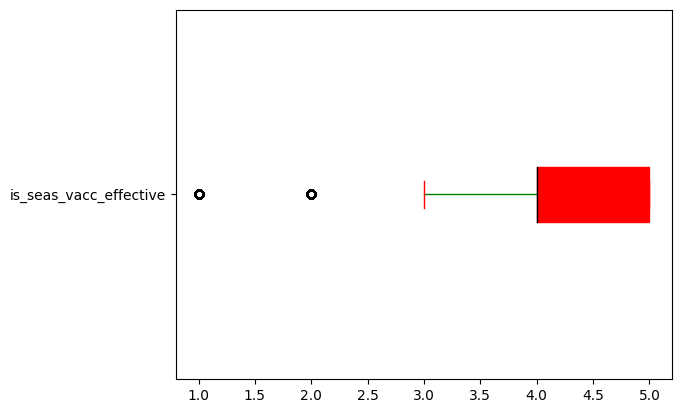

In [226]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['is_seas_vacc_effective'].plot.box(color=props2, patch_artist = True, vert = False) 
# few are on lower side; Ignore outliers

print(df_vac.is_seas_vacc_effective.isnull().sum()) #0 Missing values
df_vac.is_seas_vacc_effective.value_counts()

                   df        sum_sq     mean_sq           F         PR(>F)
h1n1_vaccine      1.0    763.264159  763.264159  700.789605  9.196705e-152
Residual      19640.0  21390.882466    1.089149         NaN            NaN


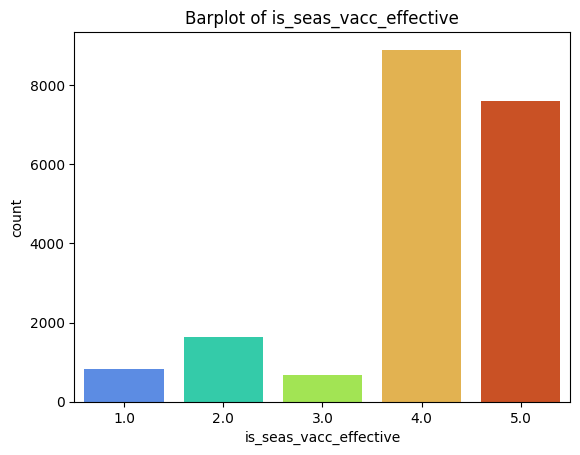

In [227]:
# Bar Plot
sns.countplot(x = 'is_seas_vacc_effective', data = df_vac , palette = 'turbo')
plt.title('Barplot of is_seas_vacc_effective')
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('is_seas_vacc_effective ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#9.2e-152 ie p_value is <0.05; Ho Reject; Good Predictor

### _____________________ 20 is_seas_risky [1,2,3,4,5] ordered 


0


2.0    6811
4.0    5984
1.0    4258
5.0    2286
3.0     303
Name: is_seas_risky, dtype: int64

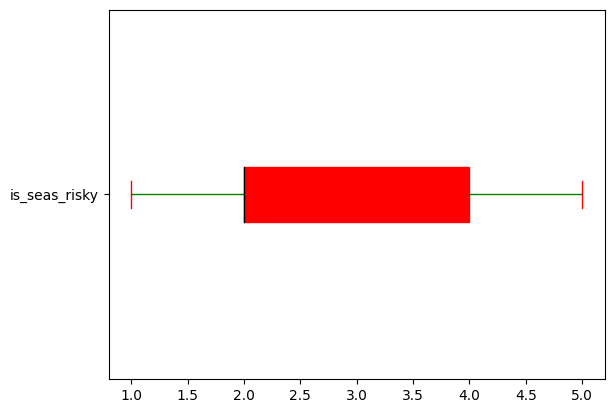

In [228]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['is_seas_risky'].plot.box(color=props2, patch_artist = True, vert = False) 
# no outliers 
print(df_vac.is_seas_risky.isnull().sum()) #0 Missing values
df_vac.is_seas_risky.value_counts() 

                   df        sum_sq      mean_sq            F  PR(>F)
h1n1_vaccine      1.0   2938.840524  2938.840524  1655.101131     0.0
Residual      19640.0  34873.293730     1.775626          NaN     NaN


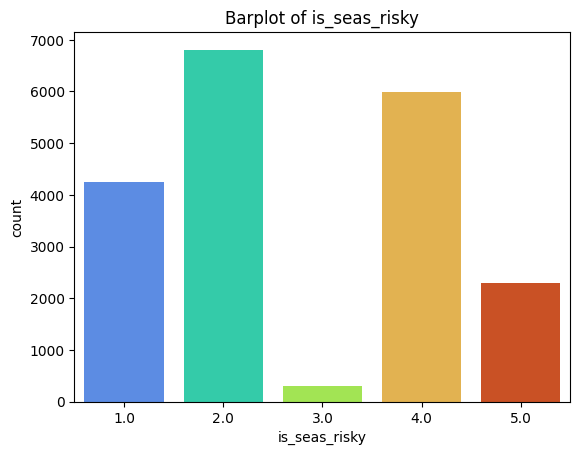

In [229]:
# Bar Plot
sns.countplot(x = 'is_seas_risky', data = df_vac , palette = 'turbo')
plt.title('Barplot of is_seas_risky')
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('is_seas_risky ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.0 ie p_value which is <0.05; Ho Reject; Good Predictor


### ___________________ 21 sick_from_seas_vacc [1,2,3,4,5] ordered


0


1.0    8996
2.0    5713
4.0    3683
5.0    1221
3.0      29
Name: sick_from_seas_vacc, dtype: int64

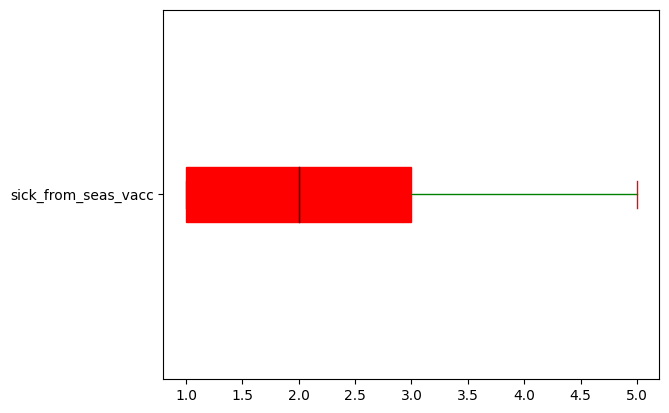

In [230]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['sick_from_seas_vacc'].plot.box(color=props2, patch_artist = True, vert = False) #No outliers

print(df_vac.sick_from_seas_vacc.isnull().sum()) #0 Missing values
df_vac.sick_from_seas_vacc.value_counts() 

                   df        sum_sq   mean_sq         F    PR(>F)
h1n1_vaccine      1.0      1.496253  1.496253  0.851088  0.356256
Residual      19640.0  34528.036789  1.758047       NaN       NaN


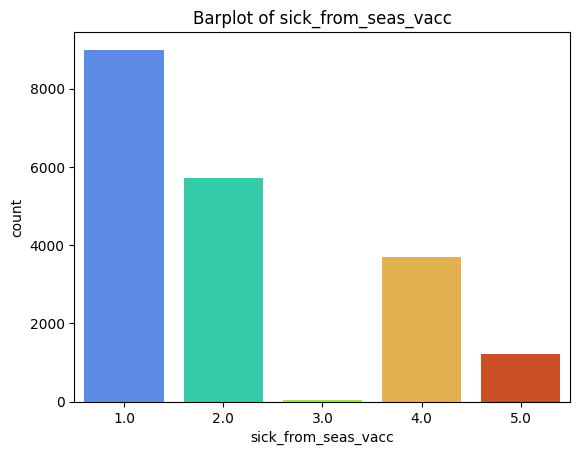

In [231]:
# Bar Plot
sns.countplot(x = 'sick_from_seas_vacc', data = df_vac , palette = 'turbo')
plt.title('Barplot of sick_from_seas_vacc')

#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('sick_from_seas_vacc ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.36 ie p_value is >0.05; Ho accepted; Bad Predictor

### _____________ 22 age_bracket [actually ordered]


In [241]:
#____boxplot
#props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
#df_vac['age_bracket'].plot.box(color=props2, patch_artist = True, vert = False) 
## oops, its object, lets change to 1,2,3 like; first see value counts
print(df_vac.age_bracket.isnull().sum()) #0 Missing values
df_vac.age_bracket.value_counts() 

0


65+ Years        4491
55 - 64 Years    4234
45 - 54 Years    4038
18 - 34 Years    3925
35 - 44 Years    2954
Name: age_bracket, dtype: int64

In [242]:
df_vac['age_bracket'] = df_vac['age_bracket'].map({'18 - 34 Years':1, '35 - 44 Years':2, '45 - 54 Years':3, '55 - 64 Years':4,
                                                  '65+ Years':5}) 

 # OR
    
# let categories be in order

#df_vac['age_bracket'] =df_vac.get('age_bracket').replace('65+ Years', 5)
#df_vac['age_bracket'] =df_vac.get('age_bracket').replace('55 - 64 Years', 4)
#df_vac['age_bracket'] =df_vac.get('age_bracket').replace('45 - 54 Years', 3)
#df_vac['age_bracket'] =df_vac.get('age_bracket').replace('18 - 34 Years', 1)
#df_vac['age_bracket'] =df_vac.get('age_bracket').replace('35 - 44 Years', 2)
# ignore warnings ! 

C:\Users\83688\AppData\Local\Temp\ipykernel_16772\3927200138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['age_bracket'] = df_vac['age_bracket'].map({'18 - 34 Years':1, '35 - 44 Years':2, '45 - 54 Years':3, '55 - 64 Years':4,


<AxesSubplot: >

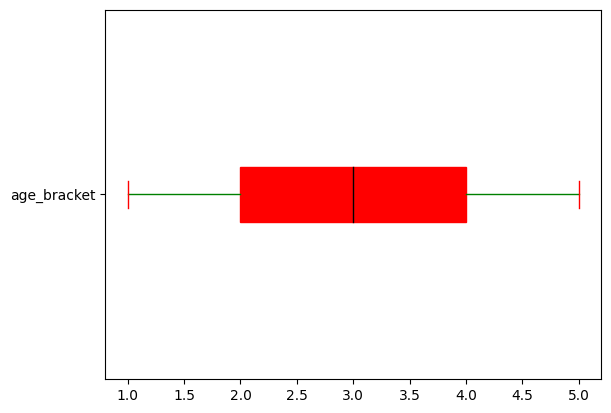

In [243]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['age_bracket'].plot.box(color=props2, patch_artist = True, vert = False) 


In [244]:
df_vac.age_bracket.value_counts() 

5    4491
4    4234
3    4038
1    3925
2    2954
Name: age_bracket, dtype: int64

<AxesSubplot: >

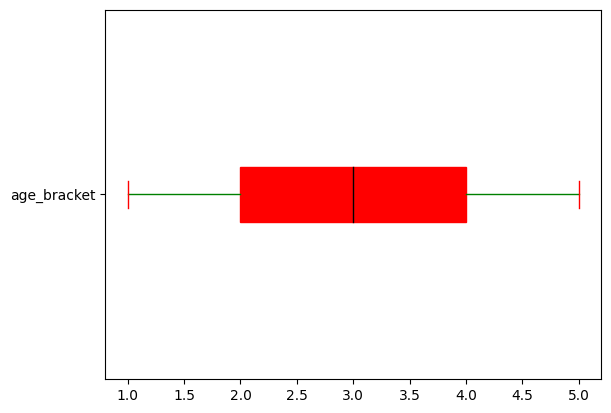

In [245]:
# now boxplot will come
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['age_bracket'].plot.box(color=props2, patch_artist = True, vert = False) #No outliers

                   df        sum_sq    mean_sq          F        PR(>F)
h1n1_vaccine      1.0     84.712087  84.712087  41.109469  1.472151e-10
Residual      19640.0  40471.098931   2.060647        NaN           NaN


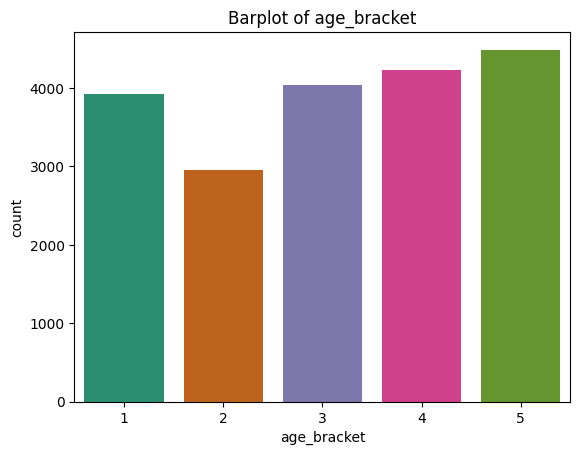

In [246]:
# Bar Plot
sns.countplot(x = 'age_bracket', data = df_vac , palette = 'Dark2')
plt.title('Barplot of age_bracket')

#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('age_bracket ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#1.5e-10 ie p_value is <0.05; Ho rejected; Good Predictor

### __________________ 23 qualification - object, Actually ordered! 3 levels


In [247]:
print(df_vac.qualification.isnull().sum())
df_vac.qualification.value_counts()

0


College Graduate    8165
Some College        5570
12 Years            4287
< 12 Years          1620
Name: qualification, dtype: int64

In [248]:
df_vac['qualification'] = df_vac['qualification'].map({'< 12 Years':1, '12 Years':2, 'Some College':3, 'College Graduate':4}) 


C:\Users\83688\AppData\Local\Temp\ipykernel_16772\3936176944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['qualification'] = df_vac['qualification'].map({'< 12 Years':1, '12 Years':2, 'Some College':3, 'College Graduate':4})


In [249]:
df_vac.qualification.value_counts()


4    8165
3    5570
2    4287
1    1620
Name: qualification, dtype: int64

                   df        sum_sq    mean_sq          F        PR(>F)
h1n1_vaccine      1.0     91.618704  91.618704  95.612329  1.572981e-22
Residual      19640.0  18819.658151   0.958231        NaN           NaN


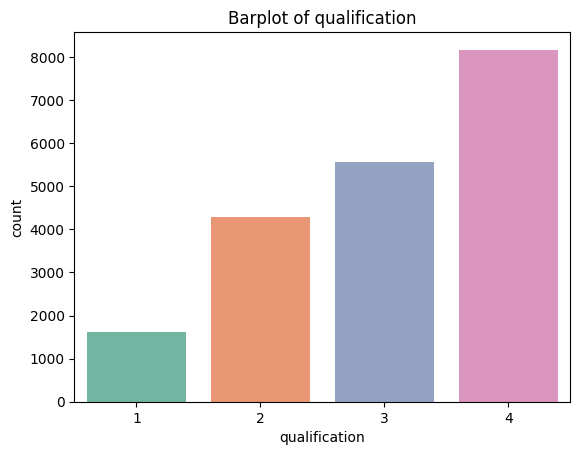

In [250]:
# Bar Plot
sns.countplot(x = 'qualification', data = df_vac , palette = 'Set2')
plt.title('Barplot of qualification')
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('qualification ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#1.57e-22 ie p_value is <0.05; Ho rejected; Good Predictor

### _________________ 24 race - object [NO ORDER, NOMINAL]; 4 levels


In [251]:
print(df_vac.race.isnull().sum()) #No Missing values
df_vac.race.value_counts()

0


White                15745
Black                 1474
Hispanic              1295
Other or Multiple     1128
Name: race, dtype: int64

In [252]:
# label encoding 'race' ; does alphabetically! 
# HERE WE CAN USE LabelEncoder!
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
  
df_vac['race']= le.fit_transform(df_vac['race']) 
df_vac.race.value_counts()

C:\Users\83688\AppData\Local\Temp\ipykernel_16772\1464467629.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['race']= le.fit_transform(df_vac['race'])


3    15745
0     1474
1     1295
2     1128
Name: race, dtype: int64

(47.734514060409225,
 2.425304962460163e-10,
 3,
 array([[ 1135.25465839,   997.39130435,   868.77018634, 12126.58385093],
        [  338.74534161,   297.60869565,   259.22981366,  3618.41614907]]))

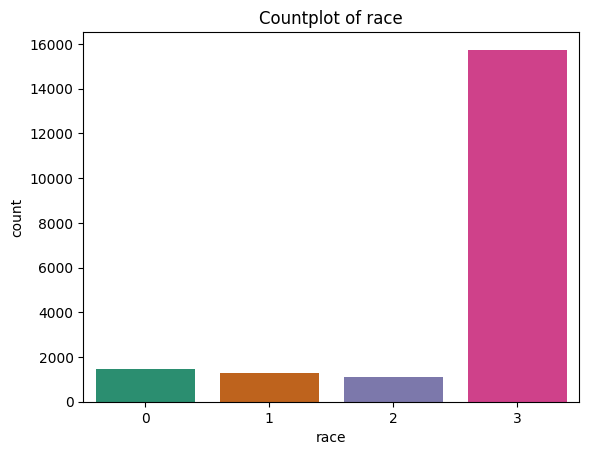

In [253]:
# Bar Plot
sns.countplot(x = 'race', data = df_vac , palette = 'Dark2')
plt.title('Countplot of race')

#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_race = pd.crosstab(df_vac.h1n1_vaccine, df_vac.race)
chi2_contingency(ct_race, correction = False)
# p_val = 2.4e-10, Ho reject, hence association exists, good predictor 

### ___________________ 25 sex - object [female, male]


In [254]:
print(df_vac.sex.isnull().sum()) #No Missing values
df_vac.sex.value_counts() 

0


Female    11638
Male       8004
Name: sex, dtype: int64

In [255]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
  
df_vac['sex']= le.fit_transform(df_vac['sex']) 
df_vac.sex.value_counts()

C:\Users\83688\AppData\Local\Temp\ipykernel_16772\4269795511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['sex']= le.fit_transform(df_vac['sex'])


0    11638
1     8004
Name: sex, dtype: int64

(12.498872792045749,
 0.0004071976301199202,
 1,
 array([[8963.42857143, 6164.57142857],
        [2674.57142857, 1839.42857143]]))

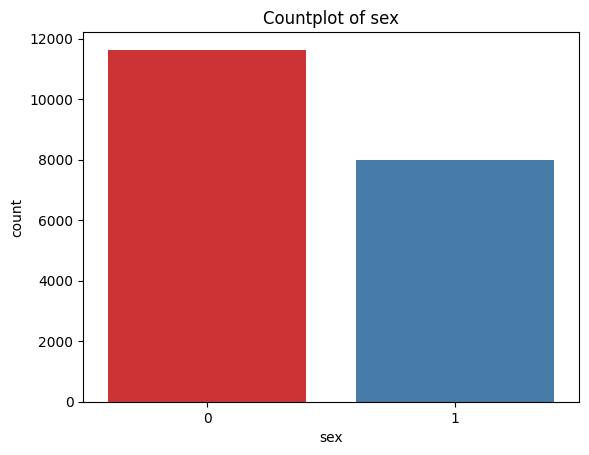

In [256]:
# Bar Plot
sns.countplot(x = 'sex', data = df_vac , palette = 'Set1')
plt.title('Countplot of sex')

#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_sex = pd.crosstab(df_vac.h1n1_vaccine, df_vac.sex)
chi2_contingency(ct_sex, correction = False)
# p_val = 00, Ho reject, hence association exists, good predictor 

### ______________ 26 income_level - object, its ordered


In [262]:
print(df_vac.income_level.isnull().sum()) # no missing values 
df_vac.income_level.value_counts()

0


<= $75,000, Above Poverty    11185
> $75,000                     6159
Below Poverty                 2298
Name: income_level, dtype: int64

In [263]:
df_vac['income_level'] = df_vac['income_level'].map({'Below Poverty':1, '<= $75,000, Above Poverty':2, '> $75,000':3}) 


C:\Users\83688\AppData\Local\Temp\ipykernel_16772\820061671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['income_level'] = df_vac['income_level'].map({'Below Poverty':1, '<= $75,000, Above Poverty':2, '> $75,000':3})


In [264]:
df_vac.income_level.value_counts()


2    11185
3     6159
1     2298
Name: income_level, dtype: int64

In [266]:
df_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

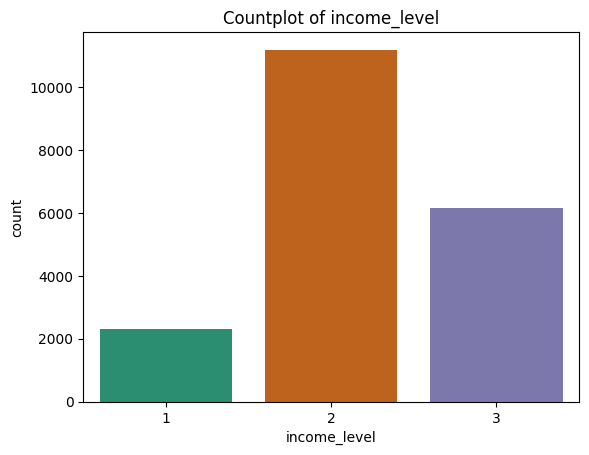

In [265]:
# Bar Plot
sns.countplot(x = 'income_level', data = df_vac , palette = 'Dark2')
plt.title('Countplot of income_level')
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('income_level ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
# 2.62e-15 ie p_value is <0.05; Ho rejected; Good Predictor


### ___________________27 marital_status - object [0,1]


In [267]:
print(df_vac.marital_status.isnull().sum()) #471 Missing values
df_vac.marital_status.value_counts() 

0


Married        10768
Not Married     8874
Name: marital_status, dtype: int64

In [268]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
  
df_vac['marital_status']= le.fit_transform(df_vac['marital_status']) 
df_vac.marital_status.value_counts()
'''
0    10768
1     8874'''
df_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

C:\Users\83688\AppData\Local\Temp\ipykernel_16772\3171582083.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['marital_status']= le.fit_transform(df_vac['marital_status'])


(53.866122687069605,
 2.1462663932476588e-13,
 1,
 array([[8293.36645963, 6834.63354037],
        [2474.63354037, 2039.36645963]]))

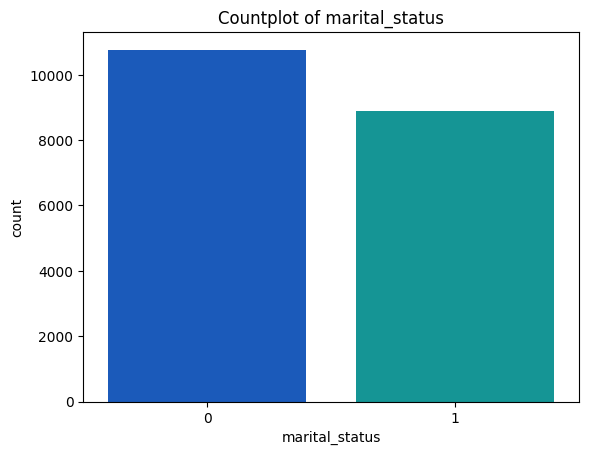

In [269]:
# Bar Plot
sns.countplot(x = 'marital_status', data = df_vac , palette = 'winter')
plt.title('Countplot of marital_status')

#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_mari = pd.crosstab(df_vac.h1n1_vaccine, df_vac.marital_status)
chi2_contingency(ct_mari, correction = False)
# p_val = 2.14e-13, Ho reject, hence association exists, good predictor 

### __________28 housing_status - object [own, rent]


In [270]:
print(df_vac.housing_status.isnull().sum())
df_vac.housing_status.value_counts() 

0


Own     14980
Rent     4662
Name: housing_status, dtype: int64

In [271]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()   
df_vac['housing_status']= le.fit_transform(df_vac['housing_status']) 
df_vac.housing_status.value_counts()

C:\Users\83688\AppData\Local\Temp\ipykernel_16772\3281849152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['housing_status']= le.fit_transform(df_vac['housing_status'])


0    14980
1     4662
Name: housing_status, dtype: int64

(24.587253027110627,
 7.101997402926761e-07,
 1,
 array([[11537.39130435,  3590.60869565],
        [ 3442.60869565,  1071.39130435]]))

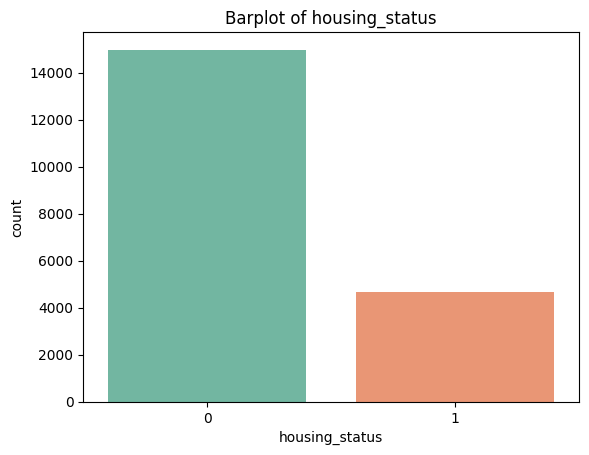

In [272]:
# Bar Plot
sns.countplot(x = 'housing_status', data = df_vac , palette = 'Set2')
plt.title('Barplot of housing_status')
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df_vac.h1n1_vaccine, df_vac.housing_status)
chi2_contingency(ct_house, correction = False)
# p_val = 7.1e-07, Ho reject, hence association exists, good predictor

### _______________ 29 employment - object [3 levels] actually ordered


In [273]:
print(df_vac.employment.isnull().sum())
df_vac.employment.value_counts() 

0


Employed              11093
Not in Labor Force     7417
Unemployed             1132
Name: employment, dtype: int64

In [274]:
df_vac['employment'] = df_vac['employment'].map({'Unemployed':1, 'Not in Labor Force':2, 'Employed':3})
df_vac.employment.value_counts() 


C:\Users\83688\AppData\Local\Temp\ipykernel_16772\3309571974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['employment'] = df_vac['employment'].map({'Unemployed':1, 'Not in Labor Force':2, 'Employed':3})


3    11093
2     7417
1     1132
Name: employment, dtype: int64

                   df       sum_sq   mean_sq         F    PR(>F)
h1n1_vaccine      1.0     2.168418  2.168418  5.938608  0.014822
Residual      19640.0  7171.333720  0.365139       NaN       NaN


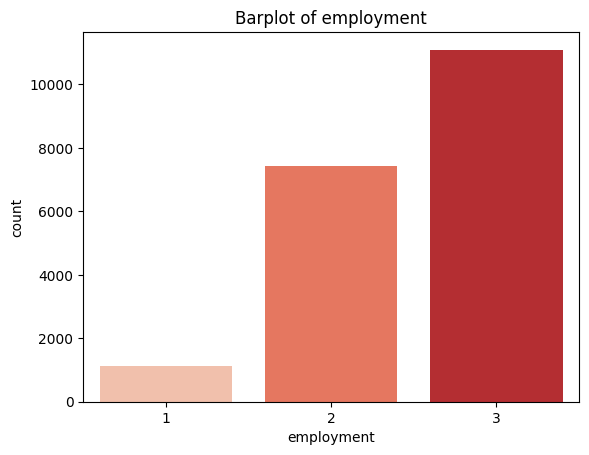

In [275]:
# Bar Plot
sns.countplot(x = 'employment', data = df_vac , palette = 'Reds')
plt.title('Barplot of employment')
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('employment ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.015 ie p_value is <0.05; Ho rejected; Good Predictor

### ____________30 census_msa - object, 3 levels, NOMINAL


In [276]:
print(df_vac.census_msa.isnull().sum()) #No Missing values
df_vac.census_msa.value_counts() 

0


MSA, Not Principle  City    8571
MSA, Principle City         5717
Non-MSA                     5354
Name: census_msa, dtype: int64

In [277]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
  
df_vac['census_msa']= le.fit_transform(df_vac['census_msa']) 
df_vac.census_msa.value_counts()

C:\Users\83688\AppData\Local\Temp\ipykernel_16772\1330449898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['census_msa']= le.fit_transform(df_vac['census_msa'])


0    8571
1    5717
2    5354
Name: census_msa, dtype: int64

(0.5600038986351584,
 0.7557822681946281,
 2,
 array([[6601.26708075, 4403.1552795 , 4123.57763975],
        [1969.73291925, 1313.8447205 , 1230.42236025]]))

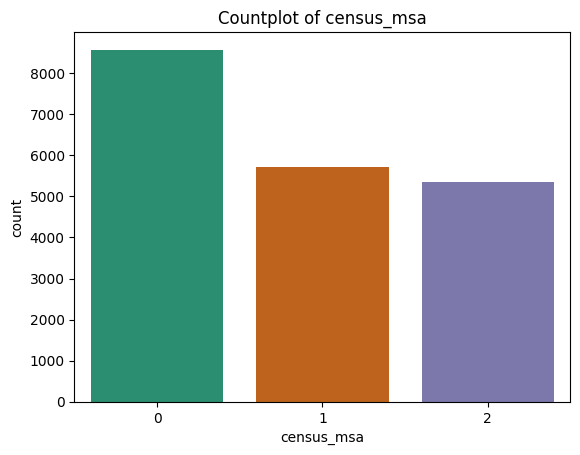

In [278]:
# Bar Plot
sns.countplot(x = 'census_msa', data = df_vac , palette = 'Dark2')
plt.title('Countplot of census_msa')
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_msa = pd.crosstab(df_vac.h1n1_vaccine, df_vac.census_msa)
ct_msa
chi2_contingency(ct_msa, correction = False)
# p_val = 0.76, > 0.05 Ho accept, hence association does not exists, bad predictor 

### ______________31 no_of_adults, ordered  


In [279]:
print(df_vac.no_of_adults.isnull().sum()) #No Missing values
df_vac.no_of_adults.value_counts()

0


1.0    11006
0.0     5683
2.0     2124
3.0      829
Name: no_of_adults, dtype: int64

                   df        sum_sq   mean_sq        F    PR(>F)
h1n1_vaccine      1.0      0.192588  0.192588  0.34578  0.556518
Residual      19640.0  10938.824060  0.556967      NaN       NaN


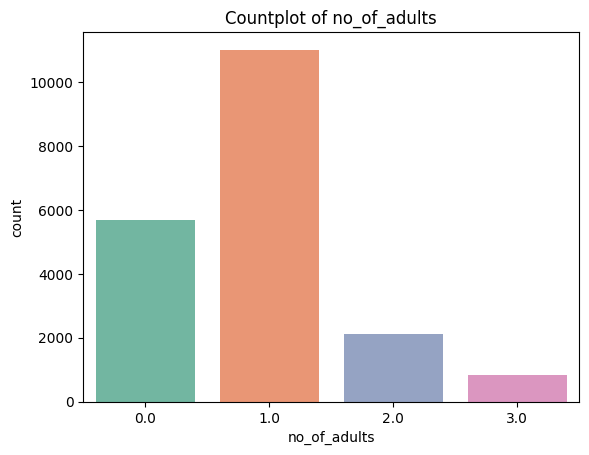

In [280]:
# Bar Plot
sns.countplot(x = 'no_of_adults', data = df_vac , palette = 'Set2')
plt.title('Countplot of no_of_adults')

#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('no_of_adults ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.55 ie p_value is >0.05; Ho accepted; Bad Predictor


### _______________ 32 no_of_children , ordered 


In [281]:
print(df_vac.no_of_children.isnull().sum()) #No Missing values
df_vac.no_of_children.value_counts() 

0


0.0    13697
1.0     2402
2.0     2207
3.0     1336
Name: no_of_children, dtype: int64

                   df        sum_sq   mean_sq         F    PR(>F)
h1n1_vaccine      1.0      0.202039  0.202039  0.229512  0.631891
Residual      19640.0  17289.080722  0.880299       NaN       NaN


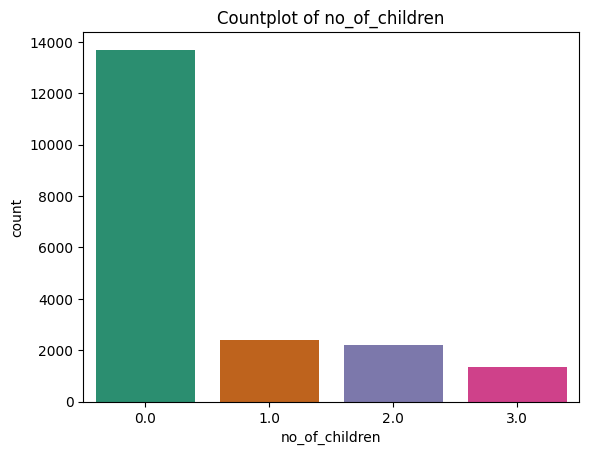

In [282]:
# Bar Plot
sns.countplot(x = 'no_of_children', data = df_vac , palette = 'Dark2')
plt.title('Countplot of no_of_children')
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('no_of_children ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.63 ie p_value is >0.05; Ho accepted; Bad Predictor

In [283]:
#++++++++++++++++++++++++
df_vac.info()
'''
lets delete
index 19, sick_from_seas_vacc
index 28, census_msa
index 29, no_of_adults
index 30, no_of_children

AND SAVE NEW DATA AS hn and export to wd and 
THEN START A NEW SCRIPT
'''
hn = df_vac.drop(['sick_from_seas_vacc','census_msa','no_of_adults','no_of_children'], axis = 1)
hn.info() # 19642, 28 columns 

hn.to_csv('hn.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

In [284]:
#________lets create dummy variables for 'race'

df2 = pd.get_dummies(hn.race, drop_first = True, prefix = 'race')

hnd = pd.concat([hn, df2], axis = 1)

# we must remove the original col 'race'

hnc = hnd.drop(['race'], axis = 1)
hnc.info() #19642, 30 columns 

hnc.to_csv('hnc.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo